In [1]:
from cnmodel import populations
from cnmodel.util import sound, random_seed
from cnmodel.protocols import Protocol
from collections import OrderedDict
import os, sys, time
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from neuron import h
import multiprocessing as mp
from scipy.signal import savgol_filter
import yaml
import seaborn as sns

--No graphics will be displayed.
[2849127] Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
[2849127] Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
[2849127] NumExpr defaulting to 16 threads.


In [6]:
fmin = 4e3
fmax = 40e3
octavespacing = 1 / 200.0  # 16 -> 66, 32 -> , 64 -> 262
n_frequencies = int(np.log2(fmax / fmin) / octavespacing) + 1
cf_fvals = (
    np.logspace(
        np.log2(fmin / 1000.0),
        np.log2(fmax / 1000.0),
        num=n_frequencies,
        endpoint=True,
        base=2,
    )
    * 1000.0
)
len(cf_fvals)

665

In [2]:
stim_avg_rates = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/stim_avg_rates.pkl', 'rb'))
stim_avg_rates_loss = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_loss/stim_avg_rates.pkl', 'rb'))

In [3]:
stimpar = {
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

input_freq = 10e3
input_level = 40

In [ ]:
pyramidal_ids_per_band = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/pyramidal_ids_per_band.pkl', 'rb'))
# pyramidal_ids_per_band_loss = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_loss/pyramidal_ids_per_band.pkl', 'rb'))

In [11]:
freqs = list(pyramidal_ids_per_band.keys())
b = (freqs[-1] - freqs[0]) / np.log(freqs[-1] / freqs[0])
a = freqs[0] - b * np.log(freqs[0])
freqs_log = a + b * np.log(freqs)

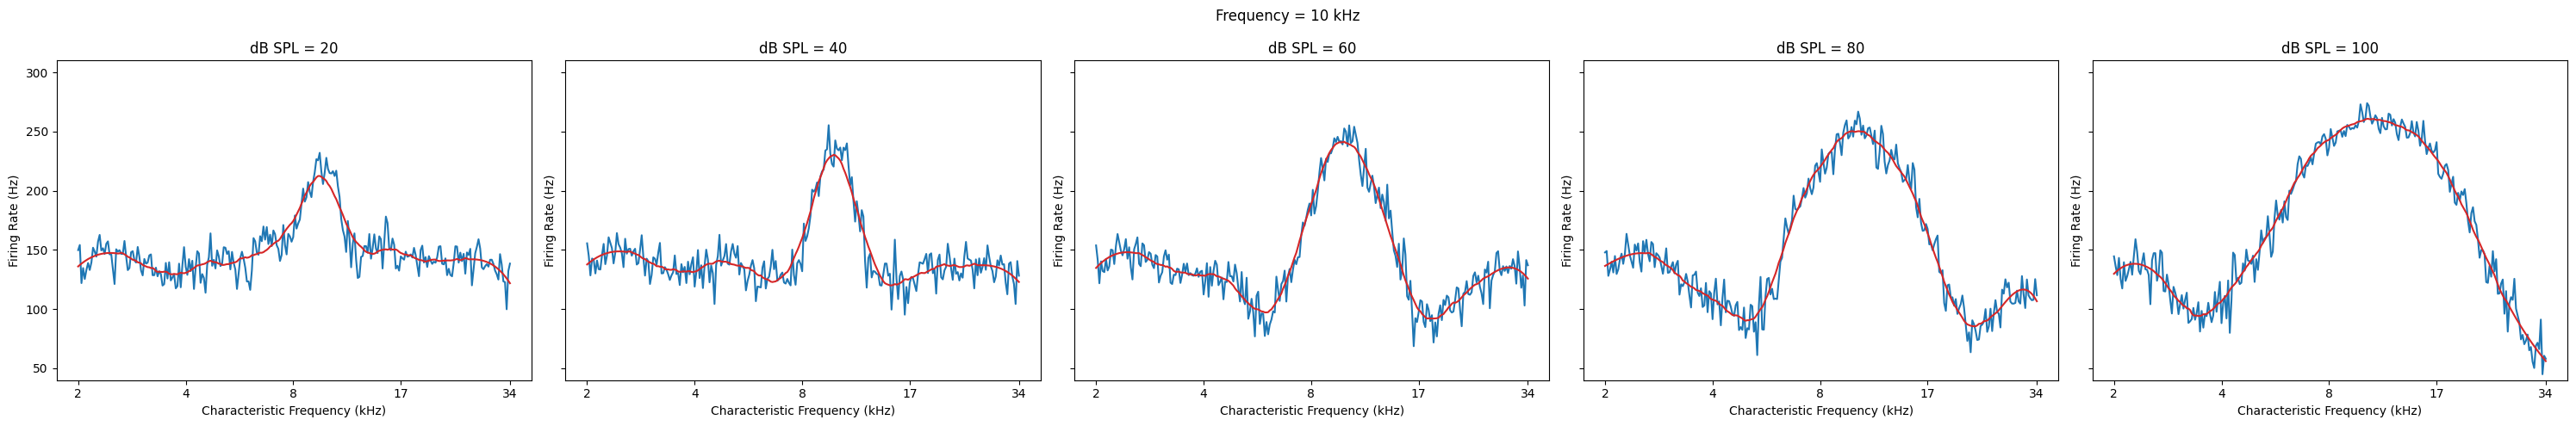

In [12]:
fig, axs = plt.subplots(1,5,figsize=(30,5), sharey=True)
axs = axs.ravel()

for i, (stim, avg_rates) in enumerate(stim_avg_rates.items()):
    level = stim.opts['dbspl']

    axs[i].plot(freqs_log, avg_rates, color='tab:blue')  #, 'o-')
    axs[i].plot(freqs_log, savgol_filter(avg_rates, 50, 3), color='tab:red')
    axs[i].set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
    axs[i].set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
    axs[i].set_xlabel('Characteristic Frequency (kHz)')
    axs[i].set_ylabel('Firing Rate (Hz)')
    axs[i].set_title(f'dB SPL = {level}')

axs[0].set_ylim([40,310])
# fig.set_dpi(300)
fig.suptitle(f'Frequency = 10 kHz')
fig.tight_layout()

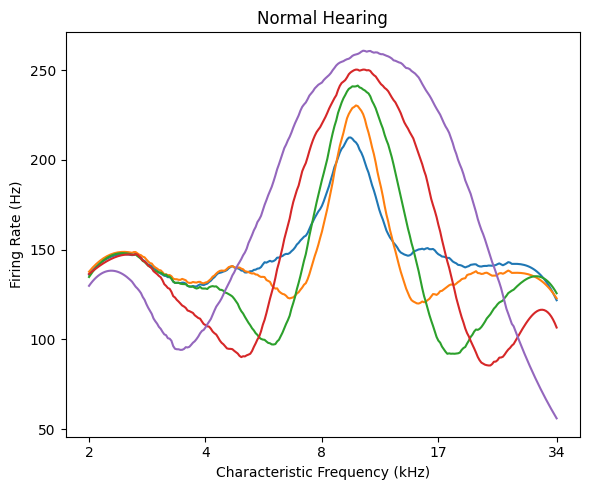

In [13]:
fig, axs = plt.subplots(1,1,figsize=(6,5))

for stim, avg_rates in stim_avg_rates.items():
    level = stim.opts['dbspl']

    # axs.plot(freqs_log, avg_rates, color='tab:blue')  #, 'o-')
    axs.plot(freqs_log, savgol_filter(avg_rates, 50, 3), label=f'{level} dB')  #, color='tab:red')

axs.set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
axs.set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
axs.set_xlabel('Characteristic Frequency (kHz)')
axs.set_ylabel('Firing Rate (Hz)')
axs.set_title('Normal Hearing')
# fig.suptitle(f'Frequency = 10 kHz')
fig.tight_layout()

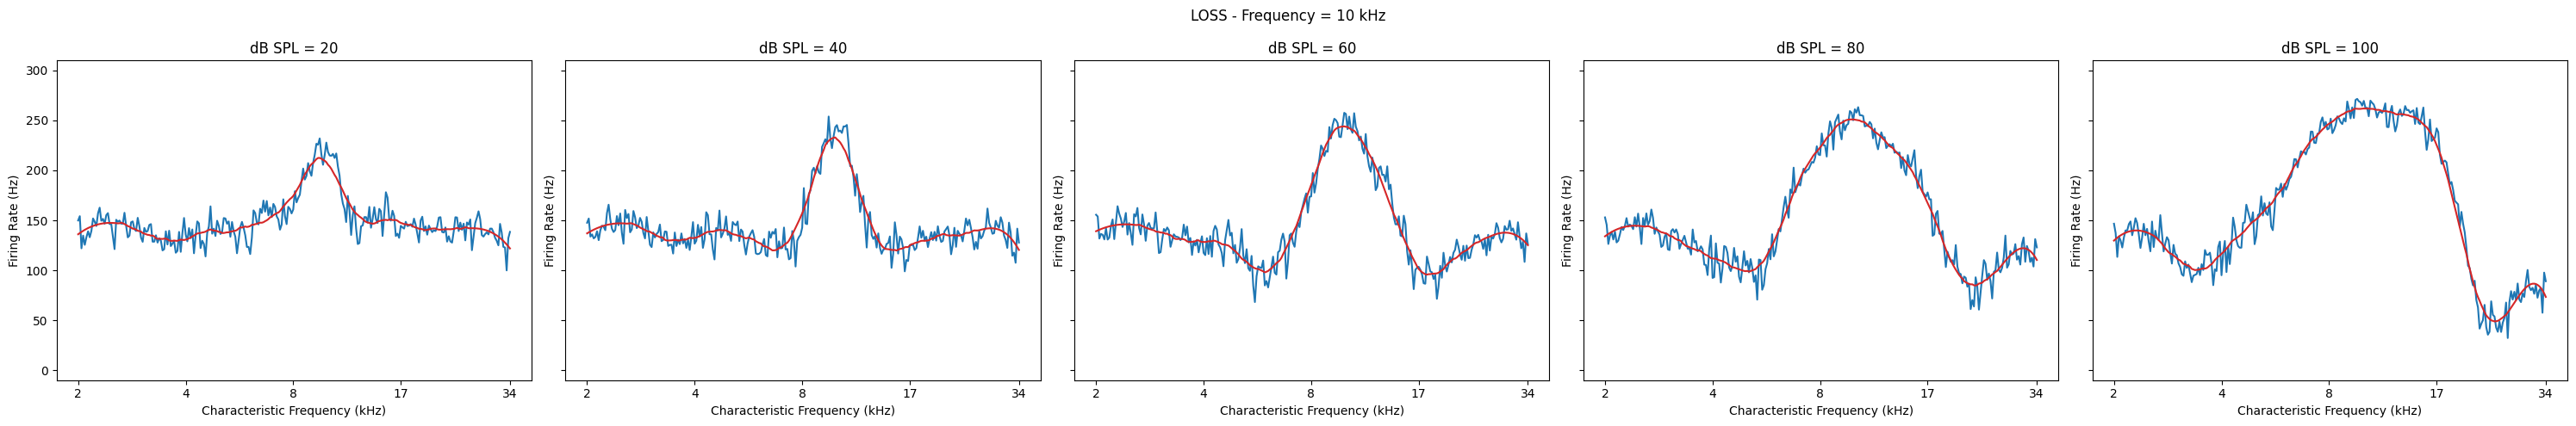

In [14]:
fig, axs = plt.subplots(1,5,figsize=(30,5), sharey=True)
axs = axs.ravel()

for i, (stim, avg_rates) in enumerate(stim_avg_rates_loss.items()):
    level = stim.opts['dbspl']

    axs[i].plot(freqs_log, avg_rates, color='tab:blue')  #, 'o-')
    axs[i].plot(freqs_log, savgol_filter(avg_rates, 50, 3), color='tab:red')
    axs[i].set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
    axs[i].set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
    axs[i].set_xlabel('Characteristic Frequency (kHz)')
    axs[i].set_ylabel('Firing Rate (Hz)')
    axs[i].set_title(f'dB SPL = {level}')

axs[0].set_ylim([-10,310])
# fig.set_dpi(300)
fig.suptitle(f'LOSS - Frequency = 10 kHz')
fig.tight_layout()

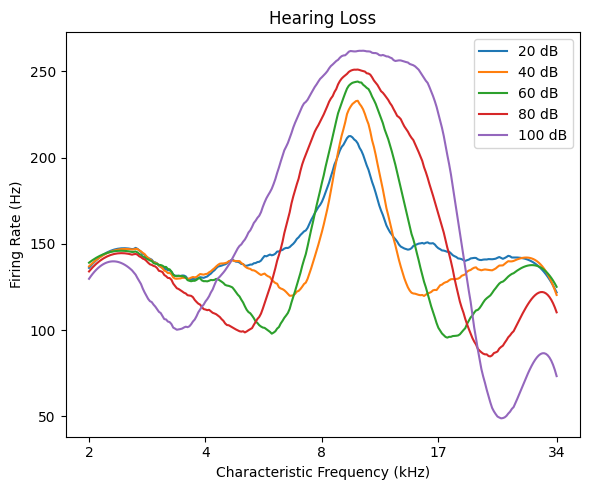

In [15]:
fig, axs = plt.subplots(1,1,figsize=(6,5))

for stim, avg_rates in stim_avg_rates_loss.items():
    level = stim.opts['dbspl']

    # axs[i].plot(freqs_log, avg_rates, color='tab:blue')  #, 'o-')
    axs.plot(freqs_log, savgol_filter(avg_rates, 50, 3), label=f'{level} dB')  #, color='tab:red')

axs.set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
axs.set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
axs.set_xlabel('Characteristic Frequency (kHz)')
axs.set_ylabel('Firing Rate (Hz)')
axs.legend(loc='upper right')
    # axs[i].set_title(f'dB SPL = {level}')

# axs.set_ylim([40,310])
# fig.set_dpi(300)
axs.set_title(f'Hearing Loss')
fig.tight_layout()

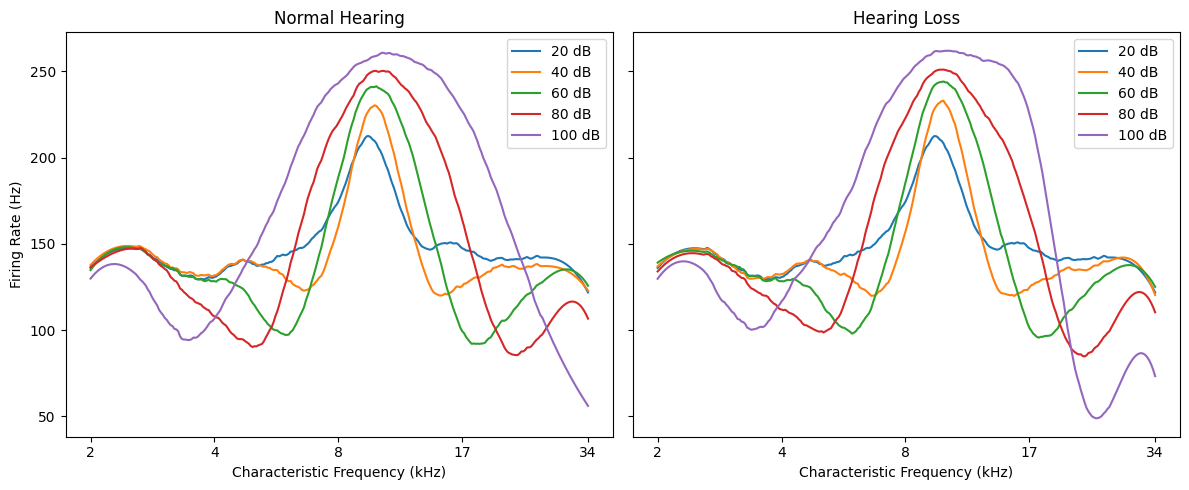

In [16]:
fig, axs = plt.subplots(1,2,figsize=(12,5), sharey=True)
axs = axs.ravel()

for (stim, avg_rates), (stim_loss, avg_rates_loss) in zip(stim_avg_rates.items(), stim_avg_rates_loss.items()):
    level = stim.opts['dbspl']
    level_loss = stim_loss.opts['dbspl']

    # axs[i].plot(freqs_log, avg_rates, color='tab:blue')  #, 'o-')
    axs[0].plot(freqs_log, savgol_filter(avg_rates, 50, 3), label=f'{level} dB')  #, color='tab:red')
    axs[1].plot(freqs_log, savgol_filter(avg_rates_loss, 50, 3), label=f'{level} dB')

for ax in axs:
    ax.set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
    ax.set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
    ax.set_xlabel('Characteristic Frequency (kHz)')
    ax.legend(loc='upper right')

axs[0].set_ylabel('Firing Rate (Hz)')
axs[0].set_title('Normal Hearing')
axs[1].set_title(f'Hearing Loss')

fig.tight_layout()

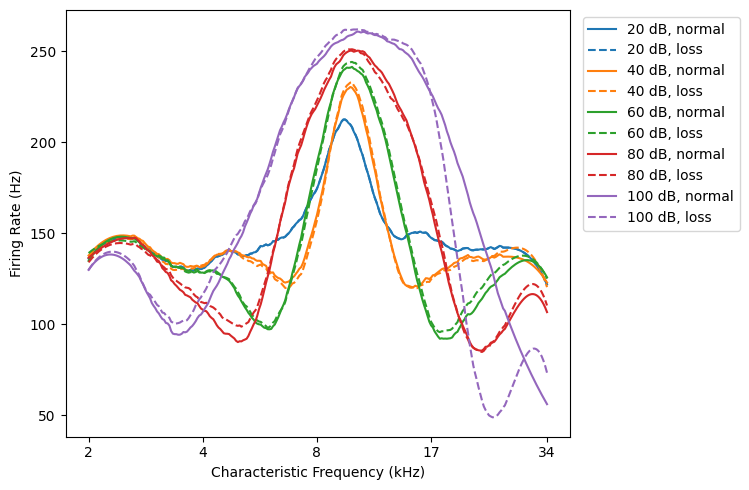

In [31]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

fig, axs = plt.subplots(1,1,figsize=(8,5), sharey=True)

for i, ((stim, avg_rates), (stim_loss, avg_rates_loss)) in enumerate(zip(stim_avg_rates.items(), stim_avg_rates_loss.items())):
    level = stim.opts['dbspl']
    level_loss = stim_loss.opts['dbspl']

    # axs[i].plot(freqs_log, avg_rates, color='tab:blue')  #, 'o-')
    axs.plot(freqs_log, savgol_filter(avg_rates, 50, 3), label=f'{level} dB, normal', color=colors[i])  #, color='tab:red')
    axs.plot(freqs_log, savgol_filter(avg_rates_loss, 50, 3), '--', label=f'{level} dB, loss', color=colors[i])


axs.set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
axs.set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
axs.set_xlabel('Characteristic Frequency (kHz)')
axs.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

axs.set_ylabel('Firing Rate (Hz)')
# axs.set_title('Normal Hearing')
# axs.set_title(f'Hearing Loss')

fig.tight_layout()

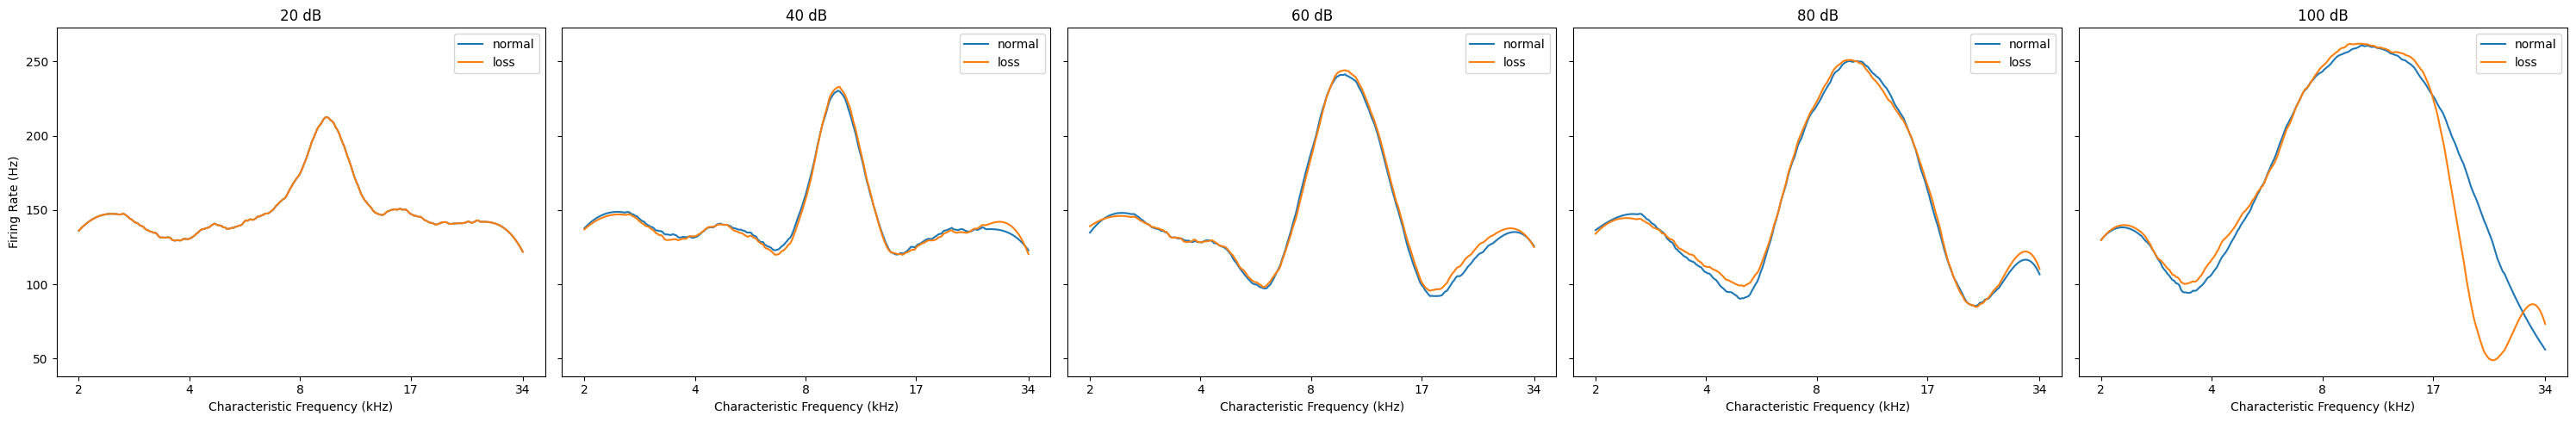

In [17]:
fig, axs = plt.subplots(1,5,figsize=(30,5), sharey=True)
axs = axs.ravel()

for i, ((stim, avg_rates), (stim_loss, avg_rates_loss)) in enumerate(zip(stim_avg_rates.items(), stim_avg_rates_loss.items())):
    level = stim.opts['dbspl']
    level_loss = stim_loss.opts['dbspl']

    # axs[i].plot(freqs_log, avg_rates, color='tab:blue')  #, 'o-')
    axs[i].plot(freqs_log, savgol_filter(avg_rates, 50, 3), label='normal')  #, color='tab:red')
    axs[i].plot(freqs_log, savgol_filter(avg_rates_loss, 50, 3), label='loss')
    axs[i].set_title(f'{level} dB')

for ax in axs:
    ax.set_xticks([freqs_log[i] for i in [0, 65, 130, 195, 261]])
    ax.set_xticklabels([round(freqs[i]/1000) for i in [0, 65, 130, 195, 261]])
    ax.set_xlabel('Characteristic Frequency (kHz)')
    ax.legend(loc='upper right')

axs[0].set_ylabel('Firing Rate (Hz)')
# axs[0].set_title('Normal Hearing')
# axs[1].set_title(f'Hearing Loss')

fig.tight_layout()

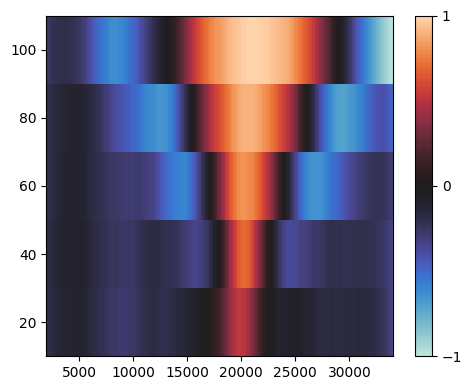

In [32]:
stim_avg_rates_arr = np.array(list(stim_avg_rates.values()))
smooth_rate_arr = savgol_filter(stim_avg_rates_arr, 50, 3)
norm_rate = 2*((smooth_rate_arr - np.min(smooth_rate_arr))/(np.max(smooth_rate_arr) - np.min(smooth_rate_arr))) - 1

fig, axs = plt.subplots(1,1,figsize=(5,4))
cmap = sns.color_palette("icefire", as_cmap=True)
im = axs.pcolormesh(freqs_log, [20, 40, 60, 80, 100], norm_rate, cmap=cmap, vmin=-1, vmax=1) 
fig.colorbar(im, ticks=[-1,0,1])
fig.tight_layout()


## Scratch

In [4]:
results = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_loss-m1_95/213cfs_1dbs_36000if_1cpb_1nreps/results_df.pkl', 'rb'))

In [5]:
results

{(36000.0, 40, 0): (<cnmodel.util.sound.TonePip at 0x1554ae624130>,
  {('pyramidal',
    np.int64(1286)): [array([-62.49677822, -62.49677634, -62.49677447, ..., -48.06950782,
           -48.02500462, -47.98101926], shape=(8002,)), array([  8.575,  14.55 ,  22.1  ,  29.5  ,  36.65 ,  47.425,  57.075,
            76.05 ,  85.95 ,  94.15 ,  99.8  , 123.975, 138.3  , 145.025,
           153.925, 164.9  , 170.3  , 183.45 , 191.875])],
   ('pyramidal',
    np.int64(1292)): [array([-62.49677822, -62.49677634, -62.49677447, ..., -64.29714366,
           -64.28156472, -64.25000499], shape=(8002,)), array([  4.55 ,  10.35 ,  19.025,  23.65 ,  27.825,  32.875,  38.425,
            43.7  ,  48.725,  54.725,  59.9  ,  65.025,  70.7  ,  76.825,
            81.475,  85.525,  90.925,  96.325, 104.025, 109.3  , 114.15 ,
           119.   , 129.75 , 136.4  , 147.35 , 155.   , 164.125, 172.55 ,
           179.575, 185.5  , 190.65 , 198.3  ])],
   ('pyramidal',
    np.int64(1299)): [array([-62.49677822, -

In [10]:
pyr_ids_per_band = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_loss-m1_95/213cfs_1dbs_36000if_1cpb_1nreps/pyramidal_ids_per_band.pkl', 'rb'))
freqs = list(pyr_ids_per_band.keys())
b = (freqs[-1] - freqs[0]) / np.log(freqs[-1] / freqs[0])
a = freqs[0] - b * np.log(freqs[0])
freqs_log = a + b * np.log(freqs)

In [6]:
stimpar = {
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

input_freq = 36e3
input_level = 40

In [7]:
spont_spikes = 0
spont_time = 0
pyr_count = 0

for stim, iterations in results.values():
    for cell, vec in iterations.items():
        temp = 6
        if 'pyr' in cell[0]:
            pyr_count += 1
            spikes = vec[1]
            spont_spikes += ((spikes >= stimpar['baseline'][0]) * (spikes < stimpar['baseline'][1])).sum()
            spont_time += stimpar['baseline'][1] - stimpar['baseline'][0]

spont_rate = spont_spikes / spont_time
spont_rate

np.float64(0.15098591549295776)

In [11]:
msfs = []
n_spikes = []

for stim, iterations in results.values():
    for cell, vec in iterations.items():
        temp = 6
        if 'pyr' in cell[0]:
            spikes = vec[1]
            num_spikes = ((spikes >= stimpar['response'][0]) & (spikes < stimpar['response'][1])).sum()
            n_spikes.append(num_spikes * (stimpar['response'][1] - stimpar['response'][0]))

            resp_spkt = spikes[((spikes >= stimpar['response'][0]) & (spikes <= stimpar['response'][1]))]
            num_spikes = len(resp_spkt)
            num_isi = num_spikes - 1 if num_spikes > 0 else 0
            msf = num_isi / (resp_spkt[-1] - resp_spkt[0]) * 1000 if num_spikes > 1 else 1
            msfs.append(msf)




In [50]:
stimpar = {
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

input_freq = 36e3
input_level = 40

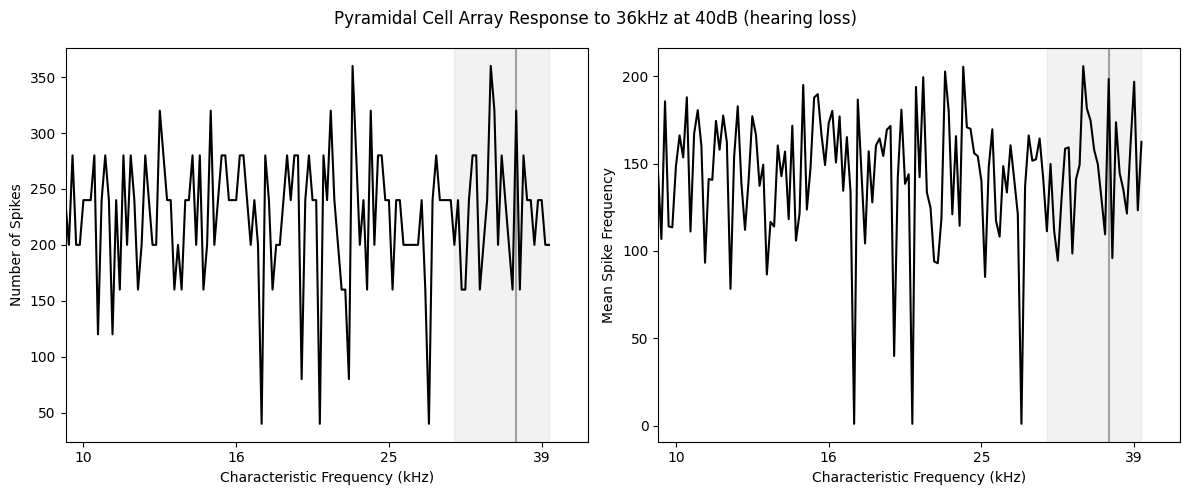

In [51]:
results = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_loss-m1_95/213cfs_1dbs_36000if_1cpb_1nreps/results_df.pkl', 'rb'))
pyr_ids_per_band = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_loss-m1_95/213cfs_1dbs_36000if_1cpb_1nreps/pyramidal_ids_per_band.pkl', 'rb'))
freqs = list(pyr_ids_per_band.keys())
b = (freqs[-1] - freqs[0]) / np.log(freqs[-1] / freqs[0])
a = freqs[0] - b * np.log(freqs[0])
freqs_log = a + b * np.log(freqs)

msfs = []
n_spikes = []

for stim, iterations in results.values():
    for cell, vec in iterations.items():
        temp = 6
        if 'pyr' in cell[0]:
            spikes = vec[1]
            num_spikes = ((spikes >= stimpar['response'][0]) & (spikes < stimpar['response'][1])).sum()
            n_spikes.append(num_spikes * (stimpar['response'][1] - stimpar['response'][0]))

            resp_spkt = spikes[((spikes >= stimpar['response'][0]) & (spikes <= stimpar['response'][1]))]
            num_spikes = len(resp_spkt)
            num_isi = num_spikes - 1 if num_spikes > 0 else 0
            msf = num_isi / (resp_spkt[-1] - resp_spkt[0]) * 1000 if num_spikes > 1 else 1
            msfs.append(msf)


loss_inds = freqs_log[np.where(np.array(freqs) > 30e3)]

fig, axs = plt.subplots(1,2,figsize=(12,5))
axs.ravel()

axs[0].plot(freqs_log, n_spikes, color='k', zorder=12)
axs[0].set_ylabel('Number of Spikes')

axs[1].plot(freqs_log, msfs, color='k', zorder=12)
axs[1].set_ylabel('Mean Spike Frequency')

for ax in axs:

    ax.axvspan(xmin=loss_inds[0], xmax=loss_inds[-1], color='grey', alpha=0.1, zorder=1)
    ax.axvline(freqs_log[freqs.index(np.float64(36274.978285640034))], color='grey', alpha=0.7, zorder=2)
    nticks = 6
    xtick_span = len(msfs)//(nticks-1)
    ax.set_xticks([freqs_log[i] for i in [xtick_span*i for i in range(nticks)]])
    ax.set_xticklabels([round(freqs[i]/1000) for i in [xtick_span*i for i in range(nticks)]])
    ax.set_xlabel('Characteristic Frequency (kHz)')
    ax.set_xlim(left=freqs_log[freqs.index(np.float64(10069.39523082581))]-1000) 

fig.suptitle('Pyramidal Cell Array Response to 36kHz at 40dB (hearing loss)')
fig.tight_layout()

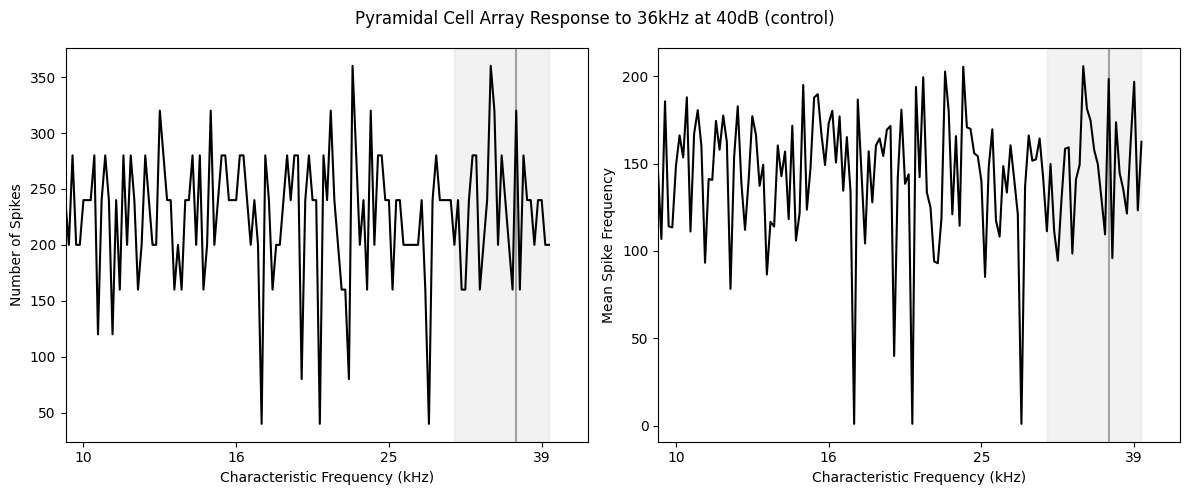

In [54]:
results = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/213cfs_1dbs_36000if_1cpb_1nreps/results_df.pkl', 'rb'))
pyr_ids_per_band = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network/213cfs_1dbs_36000if_1cpb_1nreps/pyramidal_ids_per_band.pkl', 'rb'))
freqs = list(pyr_ids_per_band.keys())
b = (freqs[-1] - freqs[0]) / np.log(freqs[-1] / freqs[0])
a = freqs[0] - b * np.log(freqs[0])
freqs_log = a + b * np.log(freqs)

msfs = []
n_spikes = []

for stim, iterations in results.values():
    for cell, vec in iterations.items():
        temp = 6
        if 'pyr' in cell[0]:
            spikes = vec[1]
            num_spikes = ((spikes >= stimpar['response'][0]) & (spikes < stimpar['response'][1])).sum()
            n_spikes.append(num_spikes * (stimpar['response'][1] - stimpar['response'][0]))

            resp_spkt = spikes[((spikes >= stimpar['response'][0]) & (spikes <= stimpar['response'][1]))]
            num_spikes = len(resp_spkt)
            num_isi = num_spikes - 1 if num_spikes > 0 else 0
            msf = num_isi / (resp_spkt[-1] - resp_spkt[0]) * 1000 if num_spikes > 1 else 1
            msfs.append(msf)


loss_inds = freqs_log[np.where(np.array(freqs) > 30e3)]

fig, axs = plt.subplots(1,2,figsize=(12,5))
axs.ravel()

axs[0].plot(freqs_log, n_spikes, color='k', zorder=12)
axs[0].set_ylabel('Number of Spikes')

axs[1].plot(freqs_log, msfs, color='k', zorder=12)
axs[1].set_ylabel('Mean Spike Frequency')

for ax in axs:

    ax.axvspan(xmin=loss_inds[0], xmax=loss_inds[-1], color='grey', alpha=0.1, zorder=1)
    ax.axvline(freqs_log[freqs.index(np.float64(36274.978285640034))], color='grey', alpha=0.7, zorder=2)
    nticks = 6
    xtick_span = len(msfs)//(nticks-1)
    ax.set_xticks([freqs_log[i] for i in [xtick_span*i for i in range(nticks)]])
    ax.set_xticklabels([round(freqs[i]/1000) for i in [xtick_span*i for i in range(nticks)]])
    ax.set_xlabel('Characteristic Frequency (kHz)')
    ax.set_xlim(left=freqs_log[freqs.index(np.float64(10069.39523082581))]-1000) 

fig.suptitle('Pyramidal Cell Array Response to 36kHz at 40dB (control)')
fig.tight_layout()

In [4]:
results = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_13000loss-m1_95/213cfs_1dbs_22000if_1cpb_1nreps/results_df.pkl', 'rb'))

In [11]:
stimpar = {
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

input_freq = 22e3
input_level = 40

In [20]:
msfs = []
pyramidal_cell_ids = []

cells = list(results.values())[0][1]

for (pop_type, cell_id), cell_data in cells.items():
    temp = 5

    if 'pyr' in pop_type:
        pyramidal_cell_ids.append(cell_id)
        cell_ve = cell_data[0]
        spkt = cell_data[1]
        resp_spkt = spkt[((spkt >= stimpar['response'][0]) & (spkt <= stimpar['response'][1]))]

        num_spikes = len(resp_spkt)
        num_isi = num_spikes - 1 if num_spikes > 0 else 0
        msf = num_isi / (resp_spkt[-1] - resp_spkt[0]) * 1000 if num_spikes > 1 else 1
        msfs.append(msf)
    else:
        break

In [22]:
len(msfs)

213

In [13]:
pyramidal_ids_per_band = pickle.load(open('/home/kedoxey/DCN_model/output/response_maps-network_13000loss-m1_95/213cfs_1dbs_22000if_1cpb_1nreps/pyramidal_ids_per_band.pkl', 'rb'))

In [14]:
avg_msfs = []

for cf, ids in pyramidal_ids_per_band.items():
    temp = 5

    msfs = []
    for pyr_id in ids:
        spkt = cells[('pyramidal', pyr_id)][1]
        resp_spkt = spkt[((spkt >= stimpar['response'][0]) & (spkt <= stimpar['response'][1]))]

        num_spikes = len(resp_spkt)
        num_isi = num_spikes - 1 if num_spikes > 0 else 0
        msf = num_isi / (resp_spkt[-1] - resp_spkt[0]) * 1000 if num_spikes > 1 else 1
        msfs.append(msf)
        
    avg_msfs.append(np.mean(msfs))


In [15]:
freqs = list(pyramidal_ids_per_band.keys())
len(freqs)
# for pyramidal_cell_id in pyramidal_cell_ids:
#     freqs.append(pyramidal._get_cf_array('rat')[pyramidal_cell_id])

213

In [16]:
b = (freqs[-1] - freqs[0]) / np.log(freqs[-1] / freqs[0])
a = freqs[0] - b * np.log(freqs[0])
freqs_log = a + b * np.log(freqs)

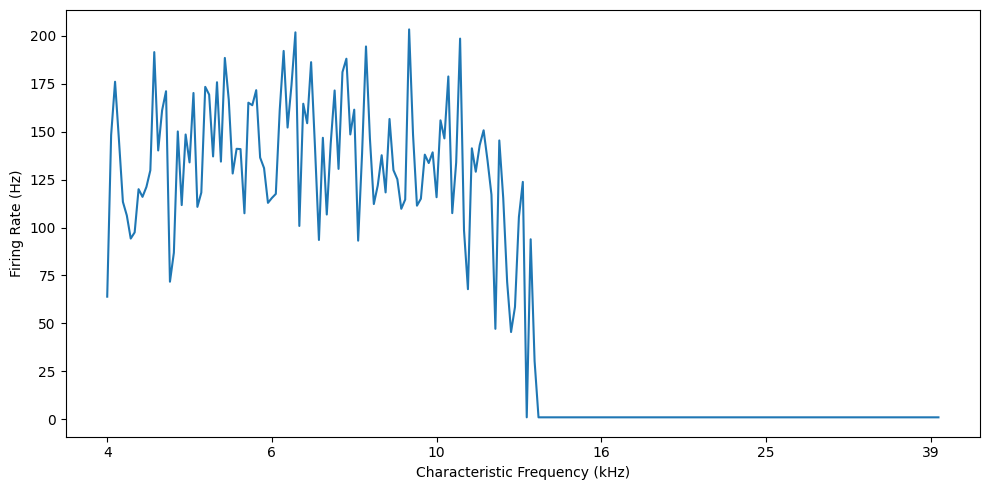

In [25]:
fig, axs = plt.subplots(1,1,figsize=(10,5))

axs.plot(freqs_log, msfs)  #, 'o-')
nticks = 6
xtick_span = len(msfs)//(nticks-1)
axs.set_xticks([freqs_log[i] for i in [xtick_span*i for i in range(nticks)]])
axs.set_xticklabels([round(freqs[i]/1000) for i in [xtick_span*i for i in range(nticks)]])
axs.set_xlabel('Characteristic Frequency (kHz)')
axs.set_ylabel('Firing Rate (Hz)')
fig.tight_layout()

In [2]:
seed = 34657845
random_seed.set_seed(seed)

34657845

In [3]:
sgc = populations.SGC(model='dummy')
dstellate = populations.DStellate()
vertical = populations.Tuberculoventral()
pyramidal = populations.Pyramidal()

In [5]:
sgc.connect(pyramidal, dstellate, vertical)
dstellate.connect(pyramidal)
vertical.connect(pyramidal)

In [4]:
fmin = 2e3
fmax = 34e3
octavespacing = 1 / 64.0  # 8.0
n_frequencies = int(np.log2(fmax / fmin) / octavespacing) + 1
fvals = (
    np.logspace(
        np.log2(fmin / 1000.0),
        np.log2(fmax / 1000.0),
        num=n_frequencies,
        endpoint=True,
        base=2,
    )
    * 1000.0
)
len(fvals), fvals

(262,
 array([ 2000.        ,  2021.8287105 ,  2043.89566729,  2066.2034707 ,
         2088.75474939,  2111.55216075,  2134.59839116,  2157.89615632,
         2181.44820156,  2205.25730218,  2229.32626379,  2253.6579226 ,
         2278.25514578,  2303.12083179,  2328.25791072,  2353.66934467,
         2379.35812804,  2405.32728791,  2431.57988442,  2458.11901109,
         2484.94779522,  2512.06939823,  2539.48701605,  2567.2038795 ,
         2595.22325463,  2623.54844318,  2652.1827829 ,  2681.12964798,
         2710.39244942,  2739.97463548,  2769.87969202,  2800.11114298,
         2830.67255073,  2861.56751654,  2892.79968098,  2924.37272436,
         2956.29036715,  2988.55637044,  3021.17453635,  3054.1487085 ,
         3087.48277249,  3121.18065629,  3155.24633077,  3189.68381012,
         3224.49715235,  3259.69045977,  3295.26787945,  3331.23360372,
         3367.59187069,  3404.3469647 ,  3441.50321686,  3479.06500556,
         3517.03675696,  3555.42294555,  3594.22809463,  3

In [10]:
pyramidal_cell_ids = []
for fval in fvals:
    pyramidal_cell_ids.extend(pyramidal.select(1, cf=fval, create=True))
len(pyramidal_cell_ids)


25

In [11]:
pyramidal.resolve_inputs(depth=2)

getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpar

In [13]:
for pop in [sgc, dstellate, vertical, pyramidal]:
    print(f'{pop.type} - {len(pop.real_cells())} cells')

sgc - 3319 cells
dstellate - 221 cells
tuberculoventral - 470 cells
pyramidal - 25 cells


In [14]:
level = 40
stimpar = {
    'level': 40,
    'freq': 10e3,
    "dur": 0.2,
    "pip": 0.04,
    "start": [0.1],
    "baseline": [50, 100],
    "response": [100, 140],
}

In [ ]:
stim = sound.TonePip(
    rate=100e3,
    duration=stimpar["dur"],
    f0=stimpar['freq'],
    dbspl=stimpar['level'],  # dura 0.2, pip_start 0.1 pipdur 0.04
    ramp_duration=2.5e-3,
    pip_duration=stimpar["pip"],
    pip_start=stimpar["start"]
)